<a href="https://colab.research.google.com/github/ataulhaque/ML/blob/main/Wheat_Classification_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Wheat Classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!mkdir ans
#from wings_classification_wheatdataset import test_wings_wheat

#

mkdir: cannot create directory ‘ans’: File exists


In [ ]:
data = pd.read_csv('wheat.csv')
shape = data.ndim
na_values_count = data.isna().sum()
dist = data.describe()
class_freq = data['category'].value_counts().sort_index()


In [ ]:
try:
  q1 = [shape, na_values_count, dist, class_freq]
  test_wings_wheat.save_answer_q1(q1)
except Exception as e:
  print("please check the expected variable")
  print(e)



please check the expected variable
name 'test_wings_wheat' is not defined


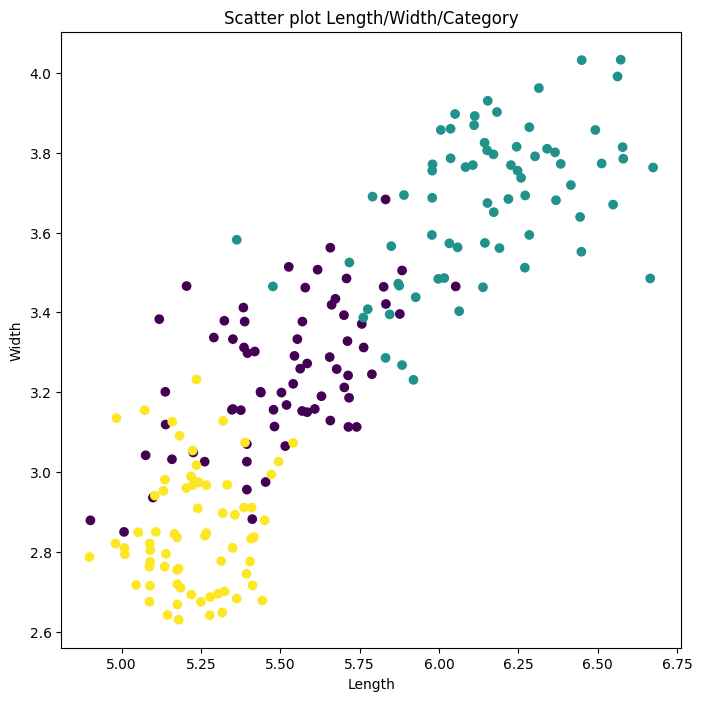

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()
x = data['length']
y = data['width']
ax.scatter(x, y, c=data['category'])
plt.title('Scatter plot Length/Width/Category')
plt.xlabel('Length')
plt.ylabel('Width')
plt.savefig('ans/scatter.png')


In [ ]:
# prompt: create a new column "scale" based on the values in the "area" column.
# Discretization thresholds:
# small scale - <12
# medium scale - 12 to 17
# large scale - >17

def scale(area):
  if area < 12:
    return 'small scale'
  elif area >= 12 and area <=17:
    return 'medium scale'
  else:
    return 'large scale'

data['scale'] = data['area'].apply(scale)


In [ ]:
interquartiles = data['area'].quantile([0.25, 0.5, 0.75])

In [ ]:
interquartiles

,area
0.25,12.270
0.50,14.355
0.75,17.305


In [ ]:
iqr = interquartiles[0.75] - interquartiles[0.25]
upper = interquartiles[0.75] + 1.5 * iqr
lower = interquartiles[0.25] - 1.5 * iqr


In [ ]:
# prompt: remove rows having values greater than upper and values less than lower

data = data[(data['area'] < upper) & (data['area'] > lower)]


In [ ]:
# prompt: encode categorical columns in the dataset to numerical values. Hint: Use label encoder
# standardize the numerical variables in the dataset to ensure they are on similar scale: use standard scaler
# store the independent variables in variable 'X' and dependent variable in variable 'Y'
# Note: do not perform scaling on category column

from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
data['scale'] = le.fit_transform(data['scale'])

# Select numerical columns for scaling
numerical_cols = ['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry', 'groove']

# Standardize numerical features
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Separate features and target variable
X = data.drop('category', axis=1)
Y = data['category']
